In [444]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt

import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

#models

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## Common preprocessing for all methods

In [447]:
# loading data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [449]:
train_df.head(5)

,judge_full_name,case_title_list,app_no_list,date_list,year,respondent_country,respondent_country_2,respondent_country_3,respondent_country_4,respondent_country_5,...,women_issue,originating_body,importance_level,v2x_libdem,v2x_gender,eu,EU_membership_period,eu_years,region,progovernment_vote
0,Louis-Edmond Pettiti,CASE OF LUTZ v. GERMANY,9912/82,25/08/1987,1987,germany,NaN,NaN,NaN,NaN,...,0,Court (Plenary),1,0.798,0.832,1,1957,30.0,Western Europe,0
1,Louis-Edmond Pettiti,CASE OF LUTZ v. GERMANY,9912/82,25/08/1987,1987,germany,NaN,NaN,NaN,NaN,...,0,Court (Plenary),1,0.798,0.832,1,1957,30.0,Western Europe,1
2,Sir Vincent Evans,CASE OF LUTZ v. GERMANY,9912/82,25/08/1987,1987,germany,NaN,NaN,NaN,NaN,...,0,Court (Plenary),1,0.730,0.821,1,1973-2020,14.0,Western Europe,0
3,Sir Vincent Evans,CASE OF LUTZ v. GERMANY,9912/82,25/08/1987,1987,germany,NaN,NaN,NaN,NaN,...,0,Court (Plenary),1,0.730,0.821,1,1973-2020,14.0,Western Europe,1
4,Ronald St. John Macdonald,CASE OF LUTZ v. GERMANY,9912/82,25/08/1987,1987,germany,NaN,NaN,NaN,NaN,...,0,Court (Plenary),1,NaN,NaN,0,NaN,NaN,Western Europe,0


In [450]:
test_df.head(3)

,ids,judge_full_name,case_title_list,app_no_list,date_list,year,respondent_country,respondent_country_2,respondent_country_3,respondent_country_4,...,women_issue,originating_body,importance_level,v2x_libdem,v2x_gender,eu,EU_membership_period,eu_years,region,progovernment_vote
0,1,Nicolas Bratza,"CASE OF EL-MASRI v. ""THE FORMER YUGOSLAV REPUB...",39630/09,2012-12-13,2012,macedonia,NaN,NaN,NaN,...,0,Court (Grand Chamber),Key cases,0.805,0.916,1,1973-2020,39.0,Western Europe,NaN
1,2,Francoise Tulkens,"CASE OF EL-MASRI v. ""THE FORMER YUGOSLAV REPUB...",39630/09,2012-12-13,2012,macedonia,NaN,NaN,NaN,...,0,Court (Grand Chamber),Key cases,0.835,0.944,1,1957,55.0,Western Europe,NaN
2,3,Josep Casadevall,"CASE OF EL-MASRI v. ""THE FORMER YUGOSLAV REPUB...",39630/09,2012-12-13,2012,macedonia,NaN,NaN,NaN,...,0,Court (Grand Chamber),Key cases,NaN,NaN,0,NaN,NaN,Western Europe,NaN


In [453]:
train_df['date_list'].unique()

array(['25/08/1987', '21/02/1984', '27/06/1968', '20/11/1989',
       '22/09/1993', '18/07/1994', '1996-09-16', '1995-09-26',
       '1996-09-02', '2012-02-07', '2012-03-15', '2013-11-07',
       '2018-12-19', '2020-06-18', '27/08/1991', '16/12/1992',
       '25/05/1993', '18/12/1996', '19/03/1997', '15/11/1996',
       '26/09/1996', '14/12/2010', '09/07/2013', '08/04/2014',
       '12/04/2016', '2016-05-17', '2016-06-23', '2016-11-08',
       '2016-12-13', '2017-09-05', '2017-09-14', '16/10/2018',
       '04/12/2018', '2019-11-21', '2020-01-20', '2020-07-07',
       '2023-03-09', '04/06/2019', '2020-12-01', '2020-12-22',
       '31/05/2022', '2010-09-10', '2010-12-16', '2014-01-28',
       '09/10/1979', '18/12/1986', '29/11/1991', '29/10/1992',
       '14/11/1960', '01/07/1961', '2011-03-18', '2011-03-24',
       '12/07/2011', '2012-02-23', '2012-06-07', '02/04/2013',
       '04/03/2014', '02/12/2014', '27/01/2015', '2015-08-27',
       '30/06/2016', '2016-12-15', '2017-01-24', '2017-

In [455]:
# Descriptive statistics
vars_of_interest = [
    'progovernment_vote',
    'v2x_libdem',
    'female',
    'judge_age',
    'home'
]
summary = (
    train_df[vars_of_interest]
      .agg(['min', 'mean', 'median', 'max'])
      .transpose()
)
summary.columns = ['Min', 'Mean', 'Median', 'Max']

# 3. Display the table
display(summary)

,Min,Mean,Median,Max
progovernment_vote,0.000,0.476286,0.000,1.000
v2x_libdem,0.059,0.692992,0.783,0.897
female,0.000,0.228829,0.000,1.000
judge_age,36.000,60.231600,61.000,86.000
home,0.000,0.072143,0.000,1.000


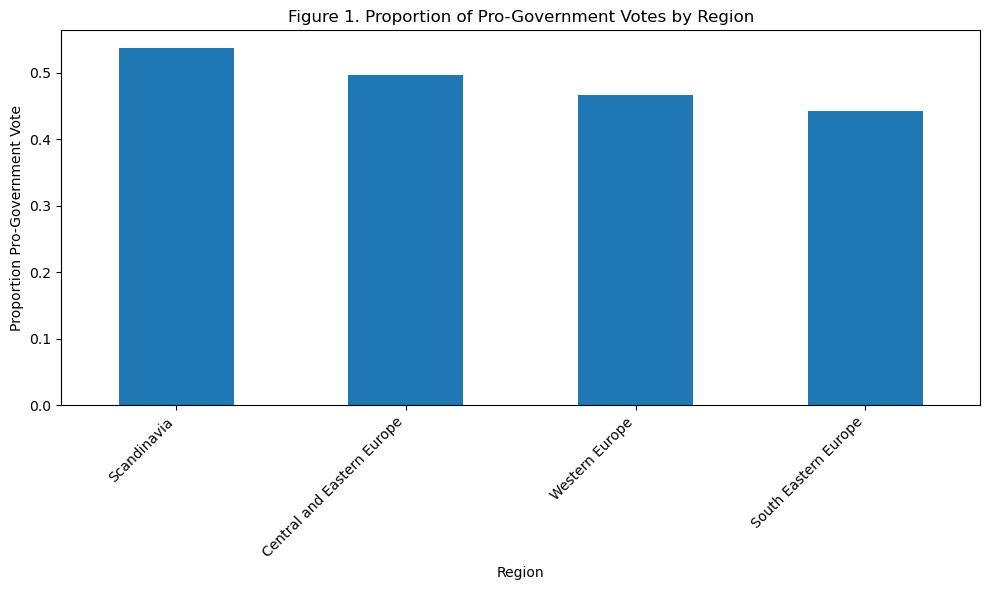

In [457]:

# Visualization 1: Proportion of pro-government votes by region

prop_region = train_df.groupby('region')['progovernment_vote'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
prop_region.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Proportion Pro-Government Vote')
plt.title('Figure 1. Proportion of Pro-Government Votes by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('fig1_judge_countries.png', dpi=300, bbox_inches='tight')
plt.show()

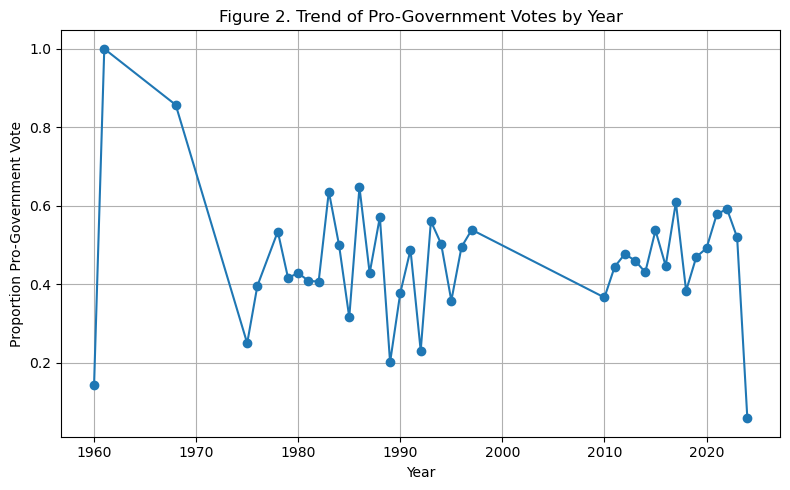

In [458]:
# Visualization 2: Trend of pro-government votes over years
prop_year = train_df.groupby('year')['progovernment_vote'].mean()
plt.figure(figsize=(8, 5))
prop_year.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Proportion Pro-Government Vote')
plt.title('Figure 2. Trend of Pro-Government Votes by Year')
plt.grid(True)
plt.tight_layout()
plt.savefig('fig2_judge_countries.png', dpi=300, bbox_inches='tight')
plt.show()

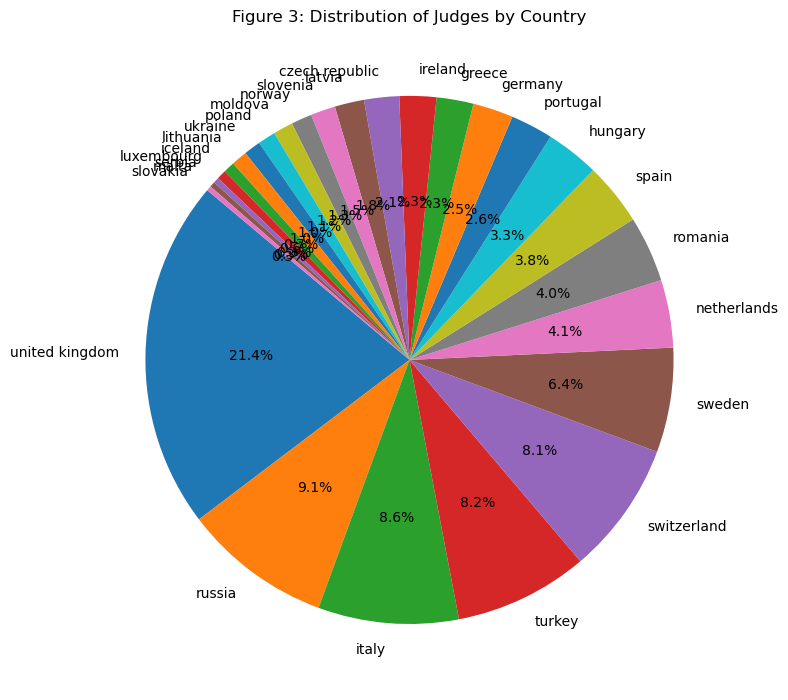

In [459]:
# Visualization 3: Judges by coutnry
country_col = 'respondent_country'
country_counts = train_df[country_col].value_counts()

plt.figure(figsize=(8,8))
country_counts.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title('Figure 3: Distribution of Judges by Country')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.savefig('fig3_judge_countries.png', dpi=300, bbox_inches='tight')
plt.show()

In [460]:
        # 1. Inspect your columns
print(train_df.columns.tolist())

# 2. (Optional) find any column with “respond” in its name
[c for c in train_df.columns if 'respond' in c.lower()]


['judge_full_name', 'case_title_list', 'app_no_list', 'date_list', 'year', 'respondent_country', 'respondent_country_2', 'respondent_country_3', 'respondent_country_4', 'respondent_country_5', 'issue', 'dissent_vote', 'dissent_alone', 'concur_vote', 'concur_alone', 'adhoc_case', 'violation_vote', 'case_separate_opinion', 'number_of_separate_opinions', 'number_of_concurring_opinions', 'number_of_dissenting_opinions', 'number_of_all_opinions', 'concur_case', 'dissent_case', 'number_of_women', 'number_of_men', 'number_of_judges', 'fraction_female', 'female', 'recruited_from_position_type', 'academic', 'diplomat', 'judge', 'lawyer', 'politician', 'public_official', 'omni', 'judgecnt', 'ccode', 'home', 'term', 'term_start', 'term_end', 'biryear', 'age_at_election', 'age_at_retirement', 'president_in_case', 'eastern_europe', 'term_year', 'term_length', 'judge_age', 'last_two_years', 'case_violation', 'violations', 'no_violations', 'conclusion', 'southern_europe', 'separate_opinion_tradition'

['respondent_country',
 'respondent_country_2',
 'respondent_country_3',
 'respondent_country_4',
 'respondent_country_5']

In [462]:
# function for date parsing since the format is not standardized 

def clean_date_list(date): 

    if pd.notna(date):
        date = str(date).strip()
    else:
        date = ""
    
    for regex_pattern in [r"\d{4}-\d{2}-\d{2}", r"\d{2}/\d{2}/\d{4}"]:
        regex_match = re.search(regex_pattern, date)
        if regex_match:
            return regex_match[0]
    
    return np.nan

In [463]:
train_df.dtypes

judge_full_name          object
case_title_list          object
app_no_list              object
date_list                object
year                      int64
                         ...   
eu                        int64
EU_membership_period     object
eu_years                float64
region                   object
progovernment_vote        int64
Length: 68, dtype: object

In [464]:
# breaking case_date into month and year 

train_df["clean_date"] = train_df["date_list"].apply(clean_date_list)
train_df["standard_date"] = pd.to_datetime(train_df["clean_date"], dayfirst= True, errors= "coerce")
train_df["case_year"] = train_df["standard_date"].dt.year.fillna(0).astype(int)
train_df["case_month"] = train_df["standard_date"].dt.month.fillna(0).astype(int)
train_df.drop(columns=["date_list", "clean_date", "standard_date"], inplace= True)

test_df["clean_date"] = test_df["date_list"].apply(clean_date_list)
test_df["standard_date"] = pd.to_datetime(test_df["clean_date"], dayfirst= True, errors= "coerce")
test_df["case_year"] = test_df["standard_date"].dt.year.fillna(0).astype(int)
test_df["case_month"] = test_df["standard_date"].dt.month.fillna(0).astype(int)
test_df.drop(columns=["date_list", "clean_date", "standard_date"], inplace= True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_20588\6000974.py:10: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  test_df["standard_date"] = pd.to_datetime(test_df["clean_date"], dayfirst= True, errors= "coerce")


In [466]:
train_df[['case_month', 'case_year']].dtypes

case_month    int32
case_year     int32
dtype: object

In [467]:
# dropping unecessary columns or cols with lots of missing data

drop_columns = ['ids', 'judge_full_name', 'EU_membership_period', 'violations', 'no_violations', 'app_no_list', 'case_title_list', 'conclusion', 'year', 'age_at_election',
                'age_at_retirement']

cols_with_missing_data = [column for column in train_df.columns if train_df[column].isnull().mean() > 0.35 and column not in ["case_year", "case_date"]]

all_drop_cols = drop_columns + cols_with_missing_data

train_df.drop(columns= all_drop_cols, inplace= True, errors= 'ignore')
test_df.drop(columns= all_drop_cols, inplace= True, errors= 'ignore')

In [475]:
train_df.head(3)

,respondent_country,issue,dissent_vote,concur_vote,adhoc_case,violation_vote,case_separate_opinion,concur_case,dissent_case,female,...,women_issue,originating_body,importance_level,v2x_libdem,v2x_gender,eu,region,progovernment_vote,case_year,case_month
0,germany,1,0,0,0,NaN,1,0.0,1.0,0.0,...,0,Court (Plenary),1,0.798,0.832,1,Western Europe,0,1987,8
1,germany,2,0,0,0,0.0,1,0.0,1.0,0.0,...,0,Court (Plenary),1,0.798,0.832,1,Western Europe,1,1987,8
2,germany,1,0,0,0,NaN,1,0.0,1.0,0.0,...,0,Court (Plenary),1,0.730,0.821,1,Western Europe,0,1987,8


In [477]:
test_df.head(3)

,respondent_country,issue,dissent_vote,concur_vote,adhoc_case,violation_vote,case_separate_opinion,concur_case,dissent_case,female,...,women_issue,originating_body,importance_level,v2x_libdem,v2x_gender,eu,region,progovernment_vote,case_year,case_month
0,macedonia,1,0,0,0,1.0,1,1.0,0.0,0.0,...,0,Court (Grand Chamber),Key cases,0.805,0.916,1,Western Europe,NaN,2012,12
1,macedonia,1,0,1,0,1.0,1,1.0,0.0,1.0,...,0,Court (Grand Chamber),Key cases,0.835,0.944,1,Western Europe,NaN,2012,12
2,macedonia,1,0,1,0,1.0,1,1.0,0.0,0.0,...,0,Court (Grand Chamber),Key cases,NaN,NaN,0,Western Europe,NaN,2012,12


In [479]:
# splitting the dataset for use in models

y = train_df['progovernment_vote']
train_df.drop(columns= ['progovernment_vote'], inplace=  True, errors= "ignore")

X = train_df.copy() # all the features for the model

X_test = test_df[X.columns].copy() # test dataset

In [481]:
#Discretizing judge age into bins

X['judge_age_groups'] = pd.qcut(X['judge_age'], 3, labels= False)
X_test['judge_age_groups'] = pd.qcut(X_test['judge_age'], 3, labels= False)

X.drop(columns=['judge_age'], inplace=True)
X_test.drop(columns=['judge_age'], inplace=True)

In [483]:
#Discretizing judge term length into bins

X['term_length_groups'] = pd.qcut(X['term_length'], 3, labels= False)
X_test['term_length_groups'] = pd.qcut(X['term_length'], 3, labels= False)

X.drop(columns=['term_length'], inplace=True)
X_test.drop(columns=['term_length'], inplace=True)

In [485]:
X.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('int32')],
      dtype=object)

In [487]:
# Adding Missing values

numeric_columns = X.select_dtypes(include=[np.number]).columns
categorical_columns = X.select_dtypes(include=["object"]).columns

impute_numeric = SimpleImputer(strategy="mean") # mean
impute_categoric = SimpleImputer(strategy="most_frequent") # mode

# fitting on training data
impute_numeric.fit(X[numeric_columns])
impute_categoric.fit(X[categorical_columns])

# imputing missing values for both X and X_test

X[numeric_columns] = impute_numeric.transform(X[numeric_columns])
X[categorical_columns] = impute_categoric.transform(X[categorical_columns])

X_test[numeric_columns] = impute_numeric.transform(X_test[numeric_columns])
X_test[categorical_columns] = impute_categoric.transform(X_test[categorical_columns])

In [489]:
X.isna().sum().sum()

0

In [491]:
X_test.isna().sum().sum()

0

In [493]:
# encoding categorical columns

for column in X.select_dtypes(include="object"):

    X[column], unique_values = pd.factorize(X[column].astype(str))

    category_map = {label: index for index,label in enumerate(unique_values)}

    X_test[column] = X_test[column].astype(str)
    X_test[column] = X_test[column].map(category_map)
    X_test[column] = X_test[column].fillna(-1)
    X_test[column] = X_test[column].astype(int)


In [495]:
# Which columns are still objects?
obj_cols = X_test.select_dtypes(include=["object"]).columns.tolist()
print("Object columns left in X_test:", obj_cols)

# Peek at their values
for c in obj_cols:
    print(c, "→", X_test[c].unique()[:10])

Object columns left in X_test: []


In [497]:
# Splitting train
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state= 7)

In [499]:
# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_predict = naive_bayes_model.predict(X_val)

nb_accuracy = accuracy_score(y_val, naive_bayes_predict)
nb_report = classification_report(y_val, naive_bayes_predict)

print("Accuracy: ", nb_accuracy)

print(nb_report)


Accuracy:  0.8678571428571429
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       733
           1       0.86      0.87      0.86       667

    accuracy                           0.87      1400
   macro avg       0.87      0.87      0.87      1400
weighted avg       0.87      0.87      0.87      1400



In [572]:
# KNN

knn_scaler = StandardScaler()
knn_X_train = X_train.copy()
knn_X_val = X_val.copy()
knn_X_train[numeric_columns] = knn_scaler.fit_transform(X_train[numeric_columns])
knn_X_val[numeric_columns] = knn_scaler.transform(X_val[numeric_columns])

knn_model = KNeighborsClassifier()
knn_model.fit(knn_X_train, y_train)
knn_pred = knn_model.predict(knn_X_val)

knn_accuracy = accuracy_score(y_val, knn_pred)
knn_report = classification_report(y_val, knn_pred)

print("Accuracy: ", knn_accuracy)

print(knn_report)



Accuracy:  0.6914285714285714
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       733
           1       0.67      0.68      0.68       667

    accuracy                           0.69      1400
   macro avg       0.69      0.69      0.69      1400
weighted avg       0.69      0.69      0.69      1400



In [578]:
# Decision Tree
# 0) Median‐impute numeric features in train/val to avoid NaNs
X_train_imp = X_train.copy()
X_val_imp   = X_val.copy()
for col in numeric_columns:
    med = X_train[col].median()
    X_train_imp[col].fillna(med, inplace=True)
    X_val_imp[col].fillna(med, inplace=True)

# 1)  Pruning/depth parameters
param_grid = {
    'max_depth':        [5, 8, 12, None],
    'min_samples_leaf': [1, 5, 10],
    'ccp_alpha':        [0.0, 0.001, 0.01]
}

# 2) Perform 5-fold CV to find the best tree
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=7),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

# 3) Extract the best estimator
tree_model = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)

Best hyperparameters: {'ccp_alpha': 0.0, 'max_depth': None, 'min_samples_leaf': 1}


In [570]:
# tree_model = DecisionTreeClassifier(random_state=7)
# tree_model.fit(X_train, y_train)
# tree_model_pred = tree_model.predict(X_val)

# tree_accuracy = accuracy_score(y_val, tree_model_pred)
# tree_report = classification_report(y_val, tree_model_pred)

# print("Accuracy: ", tree_accuracy)

# # print(tree_report)


Accuracy:  0.9728571428571429


In [507]:
# SVM

svm_scaler = StandardScaler()
svm_X_train = X_train.copy()
svm_X_val = X_val.copy()
svm_X_train[numeric_columns] = svm_scaler.fit_transform(X_train[numeric_columns])
svm_X_val[numeric_columns] = svm_scaler.transform(X_val[numeric_columns])

svm_model = SVC(kernel="linear", random_state=7)
svm_model.fit(svm_X_train, y_train)
svm_pred = svm_model.predict(svm_X_val)

svm_accuracy = accuracy_score(y_val, svm_pred)
svm_report = classification_report(y_val, svm_pred)

print("Accuracy: ", svm_accuracy)

print(svm_report)

Accuracy:  0.9164285714285715
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       733
           1       0.91      0.92      0.91       667

    accuracy                           0.92      1400
   macro avg       0.92      0.92      0.92      1400
weighted avg       0.92      0.92      0.92      1400



In [508]:
from sklearn.metrics import confusion_matrix
# Compute predictions and the confusion matrix

y_pred = tree_model.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 720
False Positives (FP): 13
False Negatives (FN): 10
True Positives (TP): 657


In [550]:
###
test_df = pd.read_csv("test.csv")
test_dummies = pd.get_dummies(test_df)
test_aligned = test_dummies.reindex(columns=X_train.columns, fill_value=0)

#tree_model.fit(X_train.values, y_train)

tree_test_pred = tree_model.predict(test_aligned)

tree_submission  = pd.read_csv("solutions_template.csv")

tree_submission['progovernment_vote'] = tree_test_pred

tree_submission.to_csv("dt_predictions.csv", index=False)

In [552]:
import zipfile

with zipfile.ZipFile('submission.zip', 'w', compression=zipfile.ZIP_DEFLATED) as z:
    z.write('dt_predictions.csv')
print("Packaged into submission.zip")


Packaged into submission.zip
